In this notebook, we will cluster the market basket data and analyze it using two methods, kmeans and dbscan.

# Importing the libraries

In [27]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Load and Prepare Data

In [29]:
customer_data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [30]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [31]:
customer_data.shape

(200, 5)

In [32]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Select features

In [33]:
# Selecting relevant features
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
# Selecting relevant features
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Elbow Method

In [37]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

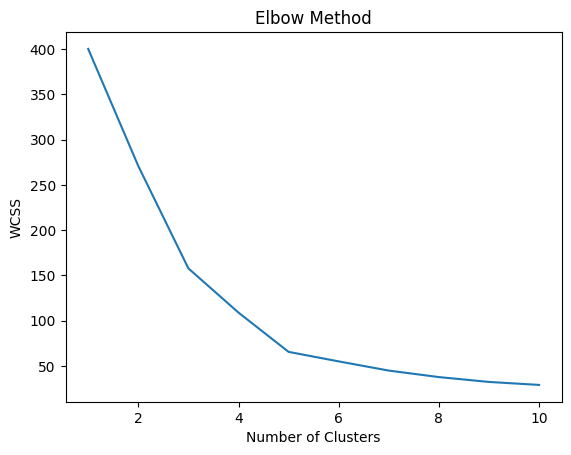

In [38]:
# Plot the Elbow method to determine optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Train the Model

In [39]:
# Based on the Elbow method, let's choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)


In [40]:
# Fit the K-means model to the scaled features
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [41]:
# Add cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_

# Plot the Graph

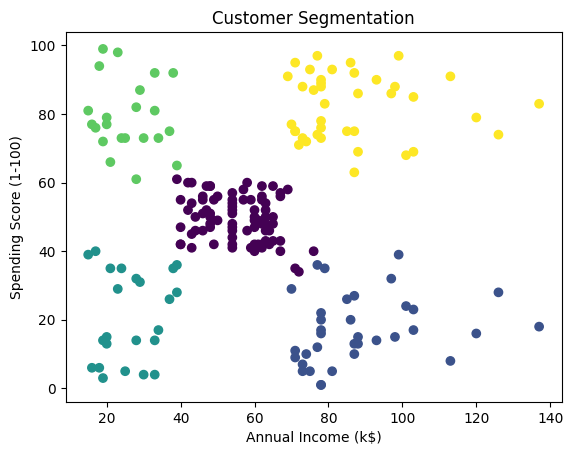

In [42]:
# Visualize the clusters
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()